In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')

from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)
import statsmodels.formula.api as sm




In [2]:

# Some cleaning
fred = pd.read_csv("FRED_MD.csv")

fred = fred.drop(0)
fred["sasdate"] = pd.to_datetime(fred["sasdate"])
fred = fred.rename(columns={"sasdate": "date"})
fred = fred.set_index("date")

# Stationarity in yearly percentage change
for c in list(fred.columns.values):
    fred[c + "_diff"] = (fred[c] - fred[c].shift(12))/fred[c].shift(12) * 100

fred.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA_diff,DSERRG3M086SBEA_diff,CES0600000008_diff,CES2000000008_diff,CES3000000008_diff,UMCSENTx_diff,DTCOLNVHFNM_diff,DTCTHFNM_diff,INVEST_diff,VXOCLSx_diff
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0733,23.4027,22.2858,31.5688,18.6601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-02-01,2451.778,2301.5,17.452,294424.7425,18369.56308,22.5056,23.7185,22.4788,31.8004,18.7580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-03-01,2467.594,2318.5,17.617,293418.6704,18523.05762,22.8298,23.8621,22.5892,31.8004,19.1254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-04-01,2483.671,2334.9,17.553,299322.8039,18534.46600,23.3161,24.2067,22.9201,32.3021,19.2478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-05-01,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6673,24.4077,23.1408,32.4565,19.6396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def scatter_plot(data, col_1, col_2, color):
    
    """
    Creates scatter plots for inflation, unemployment rate, Fed Funds rate, the S&P500 Composite Index
    """
    
    fig, ax = plt.subplots(figsize=(10,4))
    
    ax.scatter(x=data[col_1], y=data[col_2], alpha=0.4, color=color)
    ax.set_xlabel("Inflation", fontname="Verdana")
    
    if col_2 == "UNRATE":
        ax.set_title("Inflation and unemployment rate", fontsize=16, fontname="Verdana", loc="left")
        ax.set_ylabel("Unemployment rate", fontname="Verdana")
    elif col_2 == "S&P 500":
        ax.set_title("Inflation and S&P500", fontsize=16, fontname="Verdana", loc="left")
        ax.set_ylabel("S&P500", fontname="Verdana")
    else:
        ax.set_title("Inflation and Fed Funds rate", fontsize=16, fontname="Verdana", loc="left")
        ax.set_ylabel("Fed Funds rate", fontname="Verdana")

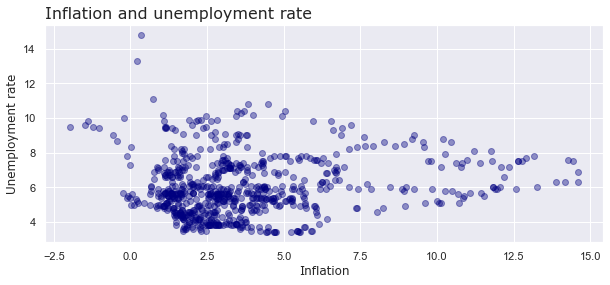

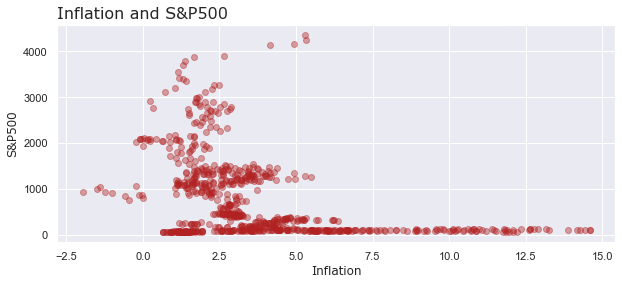

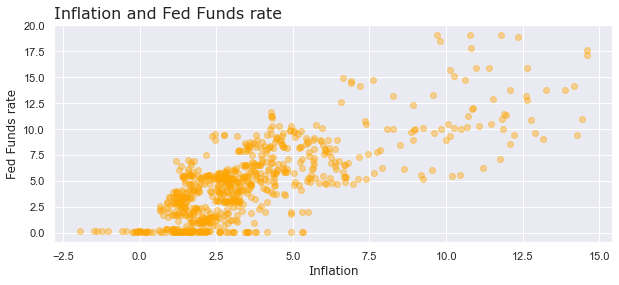

In [4]:
for f,c in dict(zip(["UNRATE", "S&P 500", "FEDFUNDS"], ["navy", "firebrick", "orange"])).items():
    scatter_plot(data=fred, col_1="CPIAUCSL_diff", col_2=f, color=c)

In [5]:
def scatter_subs(data, col_1, col_2, color):
    
    """
    Break down scatterplots into different years
    """
    
    data1 = data.loc["1960-01-01":"1979-12-01", :]
    data2 = data.loc["1980-01-01":"1999-12-01", :]
    data3 = data.loc["2000-01-01":"2019-01-01", :]

    fig, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True)
    
    ax[0].scatter(x=data1[col_1], y=data1[col_2], alpha=0.4, color=color)
    ax[1].scatter(x=data2[col_1], y=data2[col_2], alpha=0.4, color=color)
    ax[2].scatter(x=data3[col_1], y=data3[col_2], alpha=0.4, color=color)

    ax[0].set_title("1960-1979", fontsize=14, fontname="Verdana")
    ax[1].set_title("1980-1999", fontsize=14, fontname="Verdana")
    ax[2].set_title("2000-2019", fontsize=14, fontname="Verdana")

    for i in list(range(3)):
        ax[i].set_xlabel("Inflation")
        if col_2 == "UNRATE":
            ax[i].set_ylabel("Unemployment rate (%)")
        elif col_2 == "S&P 500":
            ax[i].set_ylabel("S&P500")
        else:
            ax[i].set_ylabel("Fed funds rate")
            

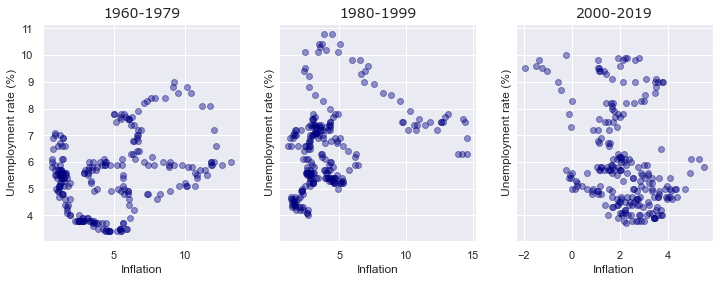

In [6]:
scatter_subs(data=fred, col_1="CPIAUCSL_diff", col_2="UNRATE", color="navy")

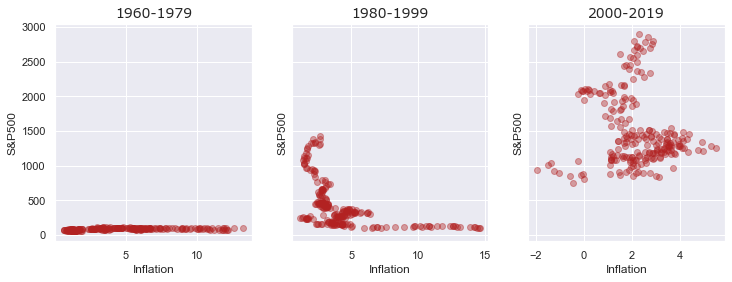

In [7]:
scatter_subs(data=fred, col_1="CPIAUCSL_diff", col_2="S&P 500", color="firebrick")

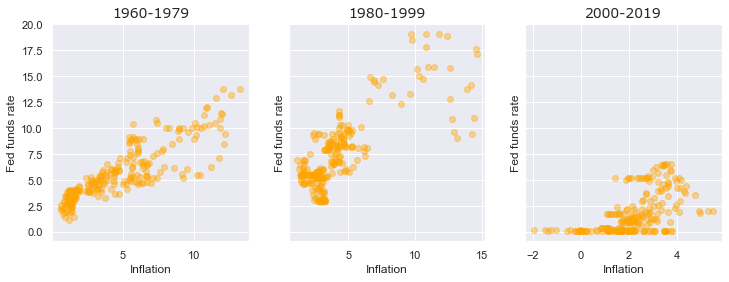

In [8]:

scatter_subs(data=fred, col_1="CPIAUCSL_diff", col_2="FEDFUNDS", color="orange")

In [9]:
from statsmodels.tsa.api import VAR

fred = pd.read_csv("FRED_MD.csv")

fred = fred.drop(0)
fred["sasdate"] = pd.to_datetime(fred["sasdate"])
fred = fred.rename(columns={"sasdate": "date"})
fred = fred.set_index("date")

# Stationarity
# First differences instead of percentage change
# It seems later on that Lasso had an issue fitting percentage change

for c in list(fred.columns.values):
    fred[c + "_diff"] = fred[c] - fred[c].shift(12)

In [12]:
!pip install pandas_datareader
import pandas as pd
import pandas_datareader.data as web
start = '1960-01-01'
end = '2022-12-31'

# Define the series IDs you want to download
series_id =  ["CPIAUCSL", "RPI", "UNRATE", "FEDFUNDS", "TWEXAFEGSMTHx", "HOUST"]
# Download data for each series
data = {}
for series_id in series_id:
    data[series_id] = web.DataReader(series_id, 'fred',start, end)

# Combine the data into a single DataFrame
df = pd.concat(data.values(), axis=1, keys=data.keys())

RemoteDataError: Unable to read URL: https://fred.stlouisfed.org/graph/fredgraph.csv?id=TWEXAFEGSMTHx
Response Text:
b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1">\r\n    <title>Error - St. Louis Fed</title>\r\n    <meta name="description" content="">\r\n    <meta name="keywords" content="">    \r\n    <link rel="stylesheet" type="text/css" href="/assets/bootstrap/dist/css/bootstrap.min.css">\r\n    <link rel="stylesheet" type="text/css" href="/css/home.min.css?1553087253">\r\n    <link rel="stylesheet" type="text/css" href="/assets/fontawesome-free/css/all.min.css">\r\n    <link rel="stylesheet" type="text/css" href="/assets/select2/dist/css/select2.min.css">\r\n    <style>p {\r\n        margin-bottom: 1.5em;\r\n    }</style>\r\n</head>\r\n<body>\r\n<link rel="preconnect" href="https://fonts.gstatic.com">\n<link href="https://fonts.googleapis.com/css2?family=Roboto&display=swap" rel="stylesheet">\n<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab&display=swap" rel="stylesheet">\n<!--googleoff: snippet-->\n<a href="#content-container" class="sr-only sr-only-focusable">Skip to main content</a>\n<!--googleon: snippet-->\n<a name="top" id="top"></a>\n<div id="container" class="container">\n    <nav class="navbar navbar-expand-lg header-not-home py-0 EL-nonhomepage-header EL-header-and-subheader">\n            <div id="hidden-user" class=\'hide\'></div>\n            <div id="action-modal"></div>\n            <div class="container-fluid align-items-stretch gx-0">\n                <div class="col-3" style="padding-left: 15px; padding-right: 15px;">\n                    <a class="research-logo-gtm" target="_" href="//research.stlouisfed.org/">\n                        <img class="header-logo-eagle d-none d-lg-block" src="//fred.stlouisfed.org/images/masthead-no-bank.png" alt="Eagle Economic Research Logo">\n                        <img class="header-logo-eagle d-lg-none" src="//fred.stlouisfed.org/images/logo-eagle.png" alt="Eagle Logo">\n                    </a>\n                </div>\n                <div class="fred-logo-div col-6 d-lg-none">\n                    <a class="fred-logo-gtm" href="//fred.stlouisfed.org/">\n                        <picture>\n                            <img class="header-logo" src="//fred.stlouisfed.org/images/fred-masthead-mobile-2x.png" alt="mini fred logo">\n                        </picture>\n                    </a>\n                </div>\n                <div class="col-lg-8 col-3 d-flex justify-content-end" style="padding-left: 15px; padding-right: 0px;">\n                    <ul id="blueheader-navbar" class="nav float-end">\n                        <li class="blueheader-navbar-item center-content-vertically d-none d-lg-block">\n                            <a class="research-resources-dropdown-gtm header-popover research-resources-popover-container" href="#">\n    <span id="research-resources-link" data-toggle="popover" class="align-icon">Economic Research Resources\n        <i class="fas fa-angle-down fa-lg header-icon-padding" alt="Open Research Resources Menu Icon"></i>\n    </span>\n</a>\n\n<div class="hide">\n    <div id="research-resources-popover">\n        <div class="container research-resources" style="padding: 7px 25px 0px 25px;">\n            <div class="row">\n                <div class="col-7 research-resources-left-column">\n                    <div class="research-resources-text">Explore resources provided by the Research Division at the Federal Reserve Bank of St. Louis</div>\n                    <div>\n                        <a rel="noopener" target="_blank" class="errd-research-link-gtm" href="https://research.stlouisfed.org" style="color: #364E71; font-family: Roboto; font-weight: 700px">research.stlouisfed.org <i class="fas fa-external-link-alt" aria-hidden="true" style="font-size: 12px"></i></a>\n                    </div>\n                </div>\n                <div class="col-5 research-resources-right-column">\n                    <ul class="header-list-popover list-group flush-list">\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-research-news-gtm" href="https://research.stlouisfed.org/publications/research-news/">Research News</a>\n                        </li>\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-economists-gtm" href="https://research.stlouisfed.org/econ/">Economists</a>\n                        </li>\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-publications-gtm"  href="https://research.stlouisfed.org/publications/">Publications</a>\n                        </li>\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-working-papers-gtm" href="https://research.stlouisfed.org/wp/">Working Papers</a>\n                        </li>\n                        <li class="list-group-item">\n                            <a rel="noopener" target="_blank" class="errd-info-services-gtm" href="https://research.stlouisfed.org/info-services.html">Information Services</a>\n                        </li>\n                    </ul>\n                </div>\n            </div>\n        </div>\n    </div>\n</div>                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically d-none d-lg-block">\n                            <a class="Switch-Products-gtm header-popover switchprod-popover-container" href="#">\n  <span id="switchProd" data-toggle="popover" data-toggle="popover" class="align-icon"> Switch Products\n    <i class="fas fa-angle-down fa-lg header-icon-padding" alt="Open Switch Products Menu Icon"></i>\n  </span>\n</a>\n\n<div class="hide">\n  <div id="switchprod-popover">\n    <ul id="switch-prod-list" class="list-group switch-products-list" role="menu" aria-labelledby="switchProduct">\n    <li id="ham-fred-dev" class="list-group-item product-fred">\n        <a class="d-flex burger-fred-gtm" role="menuitem" href="//fred.stlouisfed.org">\n            <span class="w-100 fred-ultra-selected fred-ultra burger-fred-gtm">FRED</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-fred-gtm"><img src="//fred.stlouisfed.org/images/favicon.ico" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-alfred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-alfred-gtm" role="menuitem" href="//alfred.stlouisfed.org">\n            <span class="fred-thin burger-alfred-gtm">AL</span>\n            <span class="w-100 fred-ultra burger-alfred-gtm">FRED</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-alfred-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-fraser" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-fraser-gtm" role="menuitem" href="https://fraser.stlouisfed.org/">\n            <span class="w-100 fred-ultra burger-fraser-gtm">FRASER</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-fraser-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-ecolowdown" class="hover-nav-econ hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-econlowdown-gtm" role="menuitem" href="https://www.econlowdown.org/">\n            <span class="w-100 fred-ultra-econ burger-econlowdown-gtm">ECON<br>LOWDOWN</span>\n            <span class="flex-shrink-1 float-end burger-econlowdown-gtm" style="padding-top: 15px"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n    </li>\n</ul>\n  </div>\n</div>                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically d-none d-lg-block">\n                            <div class="hidden-xs" id="signin-wrap">\n                                <div id="user-nav" class="EL-my-account-link"></div>\n                            </div>\n                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically d-lg-none">\n                            <a class="hamburger-popover-container header-popover hamburger-gtm" href="#">\n    <i id="hamburger" data-toggle="popover" class="fas fa-bars hamburger-header" alt="Open Mobile Hamburger Menu"></i>\n</a>\n\n<div class="hide">\n    <div id="hamburger-popover">\n        <div class="hamburger-search-padding">\n            <div class=\'input-group\'>\n                <input type="text" class="form-control search-input nav-search" placeholder="Search FRED data...">\n                <button class="btn search-submit nav-search-button" type="submit">\n                    <i class="fa fa-search" alt="Submit Mobile Hamburger Search"></i>\n                </button>\n            </div>\n        </div>\n        <div id="hamburger-navigation">\n            <div id="hamburger-home">\n                <ul class="list-group flush-list hamburger-list col-12" style="padding-bottom: 20px;">\n                    <li class="list-group-item">\n                        <a class="burger-calendar-gtm" href="https://fred.stlouisfed.org/releases/calendar">Release Calendar</a>\n                    </li>\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-tools\')">\n                        <a class="burger-tools-gtm" href="#">FRED Tools\n                            <i class="fas fa-angle-right hamburger-nxt-page-icon" alt="FRED Tools Hamburger Submenu Icon"></i>\n                        </a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-blog-gtm" href="https://fredblog.stlouisfed.org">FRED Blog</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-news-gtm" href="https://news.research.stlouisfed.org/category/fred-announcements/">FRED News</a>\n                    </li>\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-about-fred\')">\n                        <a class="burger-about-gtm" href="#">About FRED\n                            <i class="fas fa-angle-right hamburger-nxt-page-icon" alt="About FRED Hamburger Submenu Icon"></i>\n                        </a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-myaccount-gtm" href="https://fredaccount.stlouisfed.org">My Account</a>\n                    </li>\n                </ul>\n                <ul class="list-group flush-list hamburger-list col-12" style="padding-bottom: 0px;">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-products\')">\n                        <a class="burger-switch-gtm" href="#">\n                            Switch Products<i class="fas fa-angle-right hamburger-nxt-page-icon" alt="Switch Products Hamburger Submenu Icon"></i>\n                        </a>\n                    </li>\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-research\')">\n                        <a class="burger-resources-gtm" href="#">\n                            Economic Research Resources<i class="fas fa-angle-right hamburger-nxt-page-icon" alt="Economic Research Resources Hamburger Submenu Icon"></i>\n                        </a>\n                        <p>Explore resources provided by the Research Division at the Federal Reserve Bank of St. Louis.</p>\n                    </li>\n                </ui>\n            </div>\n            \n            <div id="hamburger-about-fred" class="hide">\n                <ul class="list-group hamburger-submenu-list col-12">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                        <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                        About FRED\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-fred-about-gtm" href="https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/"> What is FRED</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-tutorials-gtm" href="https://fredhelp.stlouisfed.org"> Tutorials</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-data-literacy-gtm" href="https://research.stlouisfed.org/info-services/data-literacy-for-librarians/ ">\n                        Data Literacy\n                        </a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-contact-us-gtm" href="https://fred.stlouisfed.org/contactus/"> Contact Us</a>\n                    </li>\n                </ul>\n            </div>\n            \n            <div id="hamburger-tools" class="hide">\n                <ul class="list-group hamburger-submenu-list col-12">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                            <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                            FRED Tools\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-fred-excel-add-in-gtm" href="https://fred.stlouisfed.org/fred-addin"> FRED Add-in for Excel</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-fred-api-gtm" href="https://fred.stlouisfed.org/docs/api/fred"> FRED API</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a class="burger-fred-mobile-apps-gtm" href="https://fred.stlouisfed.org/fred-mobile"> FRED Mobile Apps</a>\n                    </li>\n                </ul>\n            </div>\n            \n            <div id="hamburger-research" class="hide">\n                <ul class="list-group hamburger-submenu-list col-12">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                        <span>\n                            <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                            Economic Research Resources\n                        </span>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-research-news-gtm" href="https://research.stlouisfed.org/publications/research-news"> Research News</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-economists-gtm" href="https://research.stlouisfed.org/econ/"> Economists</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-publications-gtm" href="https://research.stlouisfed.org/publications/"> Publications</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-working-papers-gtm" href="https://research.stlouisfed.org/wp/"> Working Papers</a>\n                    </li>\n                    <li class="list-group-item">\n                        <a rel="noopener" target="_blank" class="burger-info-services-gtm" href="https://research.stlouisfed.org/info-services.html"> Information Services</a>\n                    </li>\n                </ul>\n            </div>\n            \n            <div id="hamburger-products" class="hide">\n                <ul class="list-group hamburger-submenu-list col-12" style="padding-bottom: 0px !important">\n                    <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                            <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                            Switch Products\n                    </li>\n                </ul>\n                <ul id="switch-prod-list" class="list-group switch-products-list" role="menu" aria-labelledby="switchProduct">\n    <li id="ham-fred-dev" class="list-group-item product-fred">\n        <a class="d-flex burger-fred-gtm" role="menuitem" href="//fred.stlouisfed.org">\n            <span class="w-100 fred-ultra-selected fred-ultra burger-fred-gtm">FRED</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-fred-gtm"><img src="//fred.stlouisfed.org/images/favicon.ico" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-alfred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-alfred-gtm" role="menuitem" href="//alfred.stlouisfed.org">\n            <span class="fred-thin burger-alfred-gtm">AL</span>\n            <span class="w-100 fred-ultra burger-alfred-gtm">FRED</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-alfred-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-fraser" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-fraser-gtm" role="menuitem" href="https://fraser.stlouisfed.org/">\n            <span class="w-100 fred-ultra burger-fraser-gtm">FRASER</span>\n            <span class="flex-shrink-1 float-end switch-icon-padding burger-fraser-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-ecolowdown" class="hover-nav-econ hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="d-flex burger-econlowdown-gtm" role="menuitem" href="https://www.econlowdown.org/">\n            <span class="w-100 fred-ultra-econ burger-econlowdown-gtm">ECON<br>LOWDOWN</span>\n            <span class="flex-shrink-1 float-end burger-econlowdown-gtm" style="padding-top: 15px"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n    </li>\n</ul>\n            </div>\n        </div>\n    </div>\n</div>                        </li>\n                    </ul>\n                </div>\n            </div>\n        <div id="notifications-container"></div>\n    </nav>\n    <div class=\'navbar navbar-expand-lg sub-header EL-header-and-subheader\'>\n        <div class="container-fluid gx-0">\n            <div class="col-lg-3 col-md-3 d-none d-lg-block" style="padding-left: 15px; padding-right: 15px;" >\n                <a class="fred-logo-gtm" href="//fred.stlouisfed.org/">\n                        <img id="fred-logo-subheader" src="//fred.stlouisfed.org/images/fred-logo-2x.png" alt="fred subheader logo">\n                </a>\n            </div>\n            <div class="col-lg-2 fred-trust-text d-none d-xl-block d-flex align-self-center" style="padding: 45px 0px 45px; margin-left: -1px;">\n                    Your trusted data source since 1991.\n            </div>\n            <div class="col d-flex justify-content-end" style="padding-left: 15px; padding-right: 15px;">\n                <div class="container-fluid gx-0">\n                    <div class="search-header-div float-end col-8 d-none d-lg-block">\n                        <div class=\'input-group EL-header-search-container\' id="search-container-header">\n                            <select id="head-search" class=\'EL-header-search\' style="\n                                border-radius: 25px 0 0 25px;\n                                background-color: #5e88a2;\n                                border-right: 0;\n                                color: #fff;\n                                font-family: Roboto,sans-serif;\n                                border: none;\n                                height: 45px;\n                            ">\n                                <option></option>\n                            </select>\n                            <input type="hidden" name="st" class="search-text-input">\n                            <button class="btn search-submit-select2" id="select2-nav-search-button" type="submit">\n                                <i class="fa fa-search"></i>\n                            </button>\n                        </div>\n                    </div>\n                    <nav class="row col-12 navbar EL-main-nav navbar-expand-sm d-none d-lg-flex" id="subheader-nav" role="navigation">\n    <div class="navbar-padding navbar-collapse collapse d-flex justify-content-end">\n        <ul id="subheader-navbar" class="nav float-end navbar-nav">\n            <li class="nav-li-subheader">\n                <a href="https://fred.stlouisfed.org/releases/calendar" class="nav-releasecal-subheader-gtm">Release Calendar</a>\n            </li>\n            <li class="nav-li-subheader">\n              <a class="sub-header-nav-tools-gtm  header-popover fred-tools-container" href="#">\n  <span id="fred-tools-link" data-toggle="popover" class="align-icon">FRED Tools\n    <i class="fas fa-angle-down header-icon-padding" alt="Open FRED Tools Menu Icon"></i>\n  </span>\n</a>\n\n<div class="hide">\n  <div id="fred-tools-popover">\n    <ul class="header-list-popover list-group flush-list">\n      <li class="list-group-item">\n        <a class="homepage-nav-tools-fred-excel-addin-gtm" href="https://fred.stlouisfed.org/fred-addin">FRED Add-in for Excel</a>\n      </li>\n      <li class="list-group-item">\n        <a class="homepage-nav-tools-fred-api-gtm" href="https://fred.stlouisfed.org/docs/api/fred">FRED API</a>\n      </li>\n      <li class="list-group-item">\n        <a class="homepage-nav-tools-fred-mobile-gtm" href="https://fred.stlouisfed.org/fred-mobile">FRED Mobile Apps</a>\n      </li>\n    </ul>\n  </div>\n</div>            </li>\n            <li class="nav-li-subheader">\n                <a href="https://news.research.stlouisfed.org/category/fred-announcements/" class="nav-news-subheader-gtm">FRED News</a>\n            </li>\n            <li class="nav-li-subheader">\n                <a href="https://fredblog.stlouisfed.org/" class="nav-fredblog-subheader-gtm">FRED Blog</a>\n            </li>\n            <li class="nav-li-subheader">\n              \n<a class="subheader-nav-about-gtm header-popover about-fred-container" href="#">\n  <span id="about-fred-link" data-toggle="popover" class="align-icon">About FRED\n    <i class="fas fa-angle-down header-icon-padding" alt="Open About FRED Menu Icon"></i>\n  </span>\n</a>\n\n<div class="hide">\n  <div id="about-fred-popover">\n      <ul class="header-list-popover list-group flush-list">\n        <li class="list-group-item">\n          <a class="about-fred-what-is-gtm" href="https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/">\n            What is FRED\n          </a>\n        </li>\n        <li class="list-group-item">\n          <a class="about-fred-tutorials-gtm" href="https://fredhelp.stlouisfed.org">\n            Tutorials\n          </a>\n        </li>\n        <li class="list-group-item">\n          <a class="about-research-data-literacy-gtm" href="https://research.stlouisfed.org/info-services/data-literacy-for-librarians/ ">\n            Data Literacy\n          </a>\n        </li>\n        <li class="list-group-item">\n          <a class="about-fred-contact-gtm" href="https://fred.stlouisfed.org/contactus/ ">\n            Contact Us\n          </a>\n        </li>\n      </ul>\n  </div>\n</div>\n            </li>\n        </ul>\n    </div>\n</nav>\n                </div>\n            </div>\n        </div>\n    </div>\n  <div class="clear row gx-0" id="content-container">\n\r\n<!--BEGIN CONTENT-->\r\n<div class="error-container">\r\n    <h1>Looking for Something?</h1>\r\n    <p class="large">We\'re sorry, the page you were looking for cannot be found. Please feel free\r\n        to <a href="/contactus/">contact us</a> if the problem persists.</p>\r\n    <p class="large">Searching may help find what are you looking for. If all else fails, you can head\r\n        <a href="/">Home</a>\r\n    </p>\r\n    <form action="/searchresults" id="search-form-404">\r\n        <label for="search-text">Search for:</label><br>\r\n        <input type="text" name="st" id="search-text" size="50" class="form-control">\r\n        <input type="submit" class="btn btn-default" value="Search" id="404-search-button" name="404-search-button">\r\n    </form>\r\n</div>\r\n<link href="/css/footer.min.css?1553087256" rel="stylesheet" media="all">\r\n<!--END CONTENT-->\r\n    <br class="clear">\n</div>\n\n    <div id="footer" class="EL-footer hidden-print row ">\n       <form action="//fred.stlouisfed.org/searchresults" id="foot-search-form" class="d-md-none col-12">\n           <div id="foot-search-container">\n               <input type="text" id="foot-search" name="st" class="js-placeholder" title="Search FRED"><button type=\'submit\' class="float-end" id="foot-search-button">&nbsp;</button>\n           </div>\n       </form>\n\n       \n        <div class="col-12 col-md-2">\n            <ul>\n                <li class="footer-section-header">SERVICES</li>\n                <li><a href="//fred.stlouisfed.org/">FRED&reg;</a></li>\n                <li><a href="//alfred.stlouisfed.org/">ALFRED&reg;</a></li>\n                <li><a href="//fraser.stlouisfed.org">FRASER&reg;</a></li>\n                <li><a href="//ideas.repec.org">IDEAS</a></li>\n            </ul>\n        </div>\n\n        <div class="col-12 col-md-2 col-lg-3">\n            <ul>\n                <li class="footer-section-header">RESEARCH</li>\n                <li><a href="//research.stlouisfed.org/regecon/">Eighth District Economy</a></li>\n                <li><a href="//research.stlouisfed.org/wp/">Working Papers</a></li>\n                <li><a href="//research.stlouisfed.org/conferences/">Events</a></li>\n                <li><a href="//research.stlouisfed.org/publications/">Publications</a></li>\n            </ul>\n        </div>\n\n        <div class="col-12 col-md-3">\n            <ul>\n                <li class="footer-section-header">TOOLS</li>\n                <li><a href="//fred.stlouisfed.org/fred-mobile/">FRED Mobile Apps</a></li>\n                <li><a href="//fred.stlouisfed.org/fred-addin/">FRED Add-In for Excel&reg;</a></li>\n                <li><a href="//fredhelp.stlouisfed.org/fred/graphs/share-my-fred-graph/embedded-fred-a-widget-just-for-you/">Embeddable FRED Widget</a></li>\n                <li><a href="//fred.stlouisfed.org/docs/api/fred/">Developer/APIs</a></li>\n            </ul>\n        </div>\n        <div class="col-12 col-md-2 ">\n            <ul>\n                <li class="footer-section-header">ABOUT</li>\n                <li><a href="//research.stlouisfed.org/jobopps/">Careers</a></li>\n                <li><a class="contact-hash footer-contactus-link-gtm" href="//fred.stlouisfed.org/contactus/">Contact</a></li>\n                <li><a href="//fred.stlouisfed.org/legal/">Legal</a></li>\n                <li><a href="//research.stlouisfed.org/privacy.html">Privacy Notice & Policy</a></li>\n            </ul>\n        </div>\n        <div class="col-12 col-md-3 col-lg-2">\n            <ul>\n                <li class="footer-section-header">OUR SITES</li>\n                <li><a href="//www.stlouisfed.org/">St. Louis Fed</a></li>\n                <li><a href="//research.stlouisfed.org">Research Division</a></li>\n                <li><a href="//www.stlouisfed.org/education/">Education Resources</a></li>\n            </ul>\n        </div>\n            </div>\n\n        <div class="footer2 hidden-print row EL-footer2" style="padding-top: 20px;">\n        <div class="col-12 col-md-3">\n            <h3>Need Help?</h3>\n            <div>\n                <a class="footer-questions-gtm" href="//fred.stlouisfed.org/contactus/" class="q-and-a-link-gtm">Questions or Comments</a>\n            </div>\n\n            <div style="padding: 10px 0 20px 0;">\n                <a class="footer-fredhelp-gtm" href="//fredhelp.stlouisfed.org/">FRED Help</a>\n            </div>\n        </div>\n\n        <div class="col-12 col-md-6">\n            <div class="col-12">\n                <h3>Subscribe to the FRED newsletter</h3>\n                <form id="subscribe-div" class="form-horizontal form-control newsletter-form" style="padding:0;margin:0">\n                    <div class="col-12" style="padding-left: 0;">\n                        <div class="input-group">\n                            <input id="subscribe-email-input" type="text" name="email" placeholder="Email" class="form-control email" style="padding: 4px 0px 4px 14px;">\n                            <button id="subscribe-email-btn" type="button" class="btn btn-default subscribe-newsletter-btn-gtm" style="color: #333; border-radius: 4px; border-color: #cccccc; padding: 0 7px 0px 7px; font-size: 14px;">Subscribe</button>\n                        </div>\n                    </div>\n                </form>\n            </div>\n        </div>\n    <hr class="d-md-none" style="border: none;">\n    <div class="col-12 col-md-3">\n        <h3 style="width: 100%; text-align: center;">Follow us</h3>\n        <div class="col-12" style="text-align: center;">\n            <a href="http://bit.ly/9ngC3L"><i class="fab fa-fw fa-2x fa-twitter"></i></a>\n            <a href="http://bit.ly/HeaderFB"><i class="fab fa-fw fa-2x fa-facebook"></i></a>\n            <a href="http://bit.ly/aY9TVF"><i class="fab fa-fw fa-2x fa-youtube"></i></a>\n            <a href="http://bit.ly/d056zL"><i class="fab fa-fw fa-2x fa-linkedin"></i></a>\n        </div>\n    </div>\n</div>\n\n    <div class="hidden-print d-md-none">\n        <a style="margin: 5px; display: block; padding:5px 10px; text-align: center" href="#top">Back to Top</a>\n    </div>\n\n    <div id="footer-bottom" class="EL-footer-bottom">\n        <div id="address">\n            Federal Reserve Bank of St. Louis,\n            One Federal Reserve Bank Plaza,\n            St. Louis, MO 63102\n        </div>\n    </div>\n\n</div>\n<script>\n    // function to parse cookies, and return the value\n    function getCookie(name) {\n        var cookies = document.cookie.split(\';\');\n        for (var i in cookies) {\n            var cookie = cookies[i].trim().split(\'=\');\n            if (cookie[0] == name) {\n                return cookie[1];\n            }\n        }\n        return null;\n    }\n    // certain pages in FRED set a custom tag variable\n    // this gets sent to Google Analytics so we can see what tags people are using\n    if (window.tags) {\n        dataLayer.push({\'tags\':tags});\n\n    }\n\n    // if the user is logged in, send the value of the liruid cookie to Google Analytics\n    var researchLiruid = getCookie(\'research-liruid\');\n    dataLayer.push({\'userId\':researchLiruid});\n\n</script>\n<script src="//fred.stlouisfed.org/assets/jquery/dist/1678747363.jquery.min.js" type="text/javascript"></script>\n<script src="//fred.stlouisfed.org/assets/popperjs/dist/umd/1678742223.popper.min.js"></script>\n<script src="//fred.stlouisfed.org/assets/bootstrap/dist/js/1678747365.bootstrap.min.js"></script>\n<script src="//fred.stlouisfed.org/assets/select2/dist/js/1678747365.select2.full.min.js"></script>\n<script>\n    // force expire the .fred.stlouisfed.org _ga cookie\n    document.cookie = document.cookie + \'_ga=;domain=.fred.stlouisfed.org;expires=Sat, 01-Jan-2000 00:00:00 GMT\';\n</script>\n\n<script defer src="//fred.stlouisfed.org/assets/jquery-menu-aim/1678747363.jquery.menu-aim.js"></script>\n\n    <script src="//fred.stlouisfed.org/js/1678896581.common.min.js"></script>\n\n<script src="/assets/js-cookie/src/js.cookie.js"></script>\n<!--script defer src="//fred.stlouisfed.org/js/1678741242.banner.js"></script-->\n<script>\n    var appConfig = {\n        uapi_host: \'https://uapi.stlouisfed.org\',\n        research_host: \'https://research.stlouisfed.org\',\n        fred_host: \'https://fred.stlouisfed.org\',\n        alfred_host: \'https://alfred.stlouisfed.org\',\n        gsi_client_id: \'115290014367-vpb89b600koe9kn0njeeq38c1unfr3gk.apps.googleusercontent.com\',\n        fred_account_host: \'https://fredaccount.stlouisfed.org\',\n    };\n\n    var domain_suffix = (window.location.hostname.split(".")[0].split("-")[1] || \'\');\n    appConfig.logged_in = Cookies.get(\'research-lirua\' + (domain_suffix ? \'-\' + domain_suffix : \'\')) !== null && Cookies.get(\'research-lirua\' + (domain_suffix ? \'-\' + domain_suffix : \'\')) !== undefined;\n    var getAuth = function(callback) {\n        if (typeof callback === \'function\') {\n            callback();\n        }\n        return;\n    };\n    window.getAuth = getAuth;\n    window.initializeGoogleSignIn = null;\n</script>\n<script src="//fred.stlouisfed.org/assets/research/fred-account-react/dist/1678747364.main.dist.js"></script>\n<script src="//fred.stlouisfed.org/assets/research/fred-account-react/dist/1678747364.vendor.dist.js"></script>\r\n</body>\r\n</html>\r\n'

In [13]:

# Rename VAR variables

new_names = ["cpi", "rpi", "unemp", "fedrate", "usd", "houst"]
old_names = ["CPIAUCSL", "RPI", "UNRATE", "FEDFUNDS", "TWEXAFEGSMTHx", "HOUST"]

for n,o in dict(zip(new_names, old_names)).items():
    fred = fred.rename(columns={o:n})
    
new_names_diff = ["cpi_diff", "rpi_diff", "unemp_diff", "fedrate_diff", "usd_diff", "houst_diff"]
old_names_diff = ["CPIAUCSL_diff", "RPI_diff", "UNRATE_diff", "FEDFUNDS_diff", "TWEXAFEGSMTHx_diff", "HOUST_diff"]

for nd,od in dict(zip(new_names_diff, old_names_diff)).items():
    fred = fred.rename(columns={od:nd})
    
fred.head()

,rpi,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA_diff,DSERRG3M086SBEA_diff,CES0600000008_diff,CES2000000008_diff,CES3000000008_diff,UMCSENTx_diff,DTCOLNVHFNM_diff,DTCTHFNM_diff,INVEST_diff,VXOCLSx_diff
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2442.158,2293.2,17.272,292266.4261,18235.77392,22.0733,23.4027,22.2858,31.5688,18.6601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-02-01,2451.778,2301.5,17.452,294424.7425,18369.56308,22.5056,23.7185,22.4788,31.8004,18.7580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-03-01,2467.594,2318.5,17.617,293418.6704,18523.05762,22.8298,23.8621,22.5892,31.8004,19.1254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-04-01,2483.671,2334.9,17.553,299322.8039,18534.46600,23.3161,24.2067,22.9201,32.3021,19.2478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-05-01,2498.026,2350.4,17.765,301364.3249,18679.66354,23.6673,24.4077,23.1408,32.4565,19.6396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(fred)


751

In [13]:
for col in fred.columns: print(col)

rpi
W875RX1
DPCERA3M086SBEA
CMRMTSPLx
RETAILx
INDPRO
IPFPNSS
IPFINAL
IPCONGD
IPDCONGD
IPNCONGD
IPBUSEQ
IPMAT
IPDMAT
IPNMAT
IPMANSICS
IPB51222S
IPFUELS
CUMFNS
HWI
HWIURATIO
CLF16OV
CE16OV
unemp
UEMPMEAN
UEMPLT5
UEMP5TO14
UEMP15OV
UEMP15T26
UEMP27OV
CLAIMSx
PAYEMS
USGOOD
CES1021000001
USCONS
MANEMP
DMANEMP
NDMANEMP
SRVPRD
USTPU
USWTRADE
USTRADE
USFIRE
USGOVT
CES0600000007
AWOTMAN
AWHMAN
houst
HOUSTNE
HOUSTMW
HOUSTS
HOUSTW
PERMIT
PERMITNE
PERMITMW
PERMITS
PERMITW
ACOGNO
AMDMNOx
ANDENOx
AMDMUOx
BUSINVx
ISRATIOx
M1SL
M2SL
M2REAL
BOGMBASE
TOTRESNS
NONBORRES
BUSLOANS
REALLN
NONREVSL
CONSPI
S&P 500
S&P: indust
S&P div yield
S&P PE ratio
fedrate
CP3Mx
TB3MS
TB6MS
GS1
GS5
GS10
AAA
BAA
COMPAPFFx
TB3SMFFM
TB6SMFFM
T1YFFM
T5YFFM
T10YFFM
AAAFFM
BAAFFM
usd
EXSZUSx
EXJPUSx
EXUSUKx
EXCAUSx
WPSFD49207
WPSFD49502
WPSID61
WPSID62
OILPRICEx
PPICMM
cpi
CPIAPPSL
CPITRNSL
CPIMEDSL
CUSR0000SAC
CUSR0000SAD
CUSR0000SAS
CPIULFSL
CUSR0000SA0L2
CUSR0000SA0L5
PCEPI
DDURRG3M086SBEA
DNDGRG3M086SBEA
DSERRG3M086SBEA
CES

In [14]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [15]:
start_date = '2009-02-01'
end_date = "2019-01-01"

In [16]:
dti = pd.date_range(start_date, periods=3, freq="M")

In [17]:


def var_create(columns, data):
    
    """
    Creates vector autoregressive model given data and list of selected variables
    Returns the MSE between forecasted and actual values
    Also returns the concatenated dataset for visualization purposes
    """
    
    data = data[columns]
    data = data.dropna(axis=0)
    data.index.to_period("M")
    
    # Split dataset and run VAR on the trained part
    data_train = data.loc["1973-01":"2009-01", :]
    var_train = VAR(data_train)
    results = var_train.fit(12)
    lag_order = results.k_ar
    forecasted = pd.DataFrame(results.forecast(data_train.values[-lag_order:], 120)) # Forecast 120 months
    
    # Rename forecasted columns
    forecasted_names = list(forecasted.columns.values)
    data_train_names = list(data_train.columns.values)
    
    var_dict = dict(zip(forecasted_names, data_train_names))
    
    for f,t in var_dict.items():
        forecasted = forecasted.rename(columns={f:t + "_fcast"})
        
    


    forecasted.index = pd.date_range(start_date, periods=forecasted.shape[0], freq="MS")

    
    
    forecasted.index.names = ["date"]
    
    # Parse together forecasted data with original dataset
    final_data = pd.merge(forecasted, data, left_index=True, right_index=True)
    final_data = final_data.sort_index(axis=0, ascending=True)
    final_data = pd.concat([data_train, final_data], sort=True, axis=0)
    final_data = final_data.sort_index(axis=0, ascending=True)
    
    var_mse = metrics.mean_squared_error(final_data.loc[start_date:end_date,"cpi_diff_fcast"], 
                           final_data.loc[start_date:end_date,"cpi_diff"])
    
    return var_mse, final_data


In [18]:
import sklearn.metrics as metrics 


mse1, df1 = var_create(columns=["unemp", "cpi_diff", "fedrate_diff", "usd_diff", "rpi_diff", "houst"], data=fred)

#print(f"The mean squared error between the forecasted and actual values is {mse1}")

C:\Users\mcnel\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [19]:
def plot_cpi(final_data, var_mse, approach):
    
    """
    Plots the actual values against forecast
    """
    
    fig, ax = plt.subplots(figsize=(14,6))
    colors = sns.color_palette("deep", 8)

    final_data["cpi_diff_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed")
    final_data["cpi_diff"].plot(ax=ax, legend=True, alpha=0.6, linestyle="solid")
    
    if approach=="traditional":
        ax.set_title("VAR in-sample forecast, traditional approach", fontsize=16, 
                     fontweight="bold", fontname="Verdana", loc="left")
    elif approach=="lasso":
        ax.set_title("VAR in-sample forecast, Lasso approach", fontsize=16, 
                     fontweight="bold", fontname="Verdana", loc="left")
    elif approach=="XGBoost":
        ax.set_title("VAR in-sample forecast, XGBoost approach", fontsize=16, 
                     fontweight="bold", fontname="Verdana", loc="left")
    else:
        ax.set_title("VAR in-sample forecast", fontsize=16, 
                     fontweight="bold", fontname="Verdana", loc="left")
    
    ax.set_ylabel("First differences", fontname="Verdana")
    ax.legend([f"VAR Forecast, MSE={var_mse}", "CPI Real Values"])

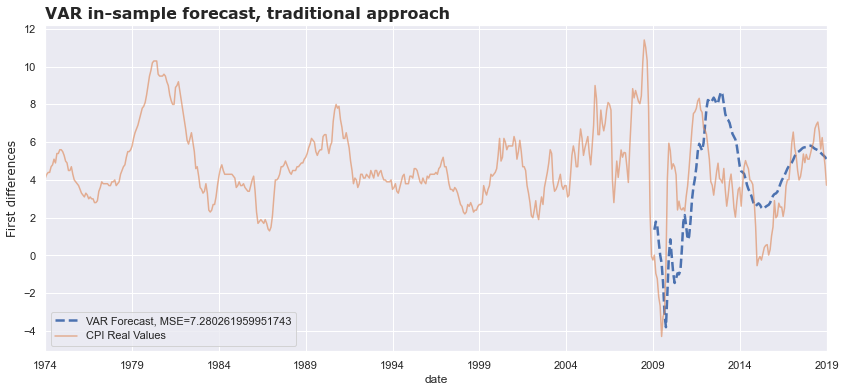

In [20]:
#!pip install seaborn
import seaborn as sns 
plot_cpi(final_data=df1, var_mse=mse1, approach="traditional")

In [21]:
def timeseries_train_test_split(X, y, testsize):
    """
    This function splits the sample into a trained and test data
    """
    
    X_train = X.loc[:"2009-01-01"] # Until a particular date
    y_train = y.loc[:"2009-01-01"]
    X_test = X.loc["2009-01-01":]
    y_test = y.loc["2009-01-01":]
    
    return X_train, y_train, X_test, y_test



In [22]:
def train_test_plot(model, X_train, X_test):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,4))
    colors = sns.color_palette("deep", 8)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "cpi_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["cpi_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["cpi_diff"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("CPI vs. Model's CPI")
    ax.set_ylabel("First differences")
    ax.legend(["Fitted CPI","Actual CPI"])

In [23]:
# Split into X and y
cpi_target = fred.dropna().cpi_diff
fred_features = fred.dropna().drop(["cpi_diff"], axis=1)

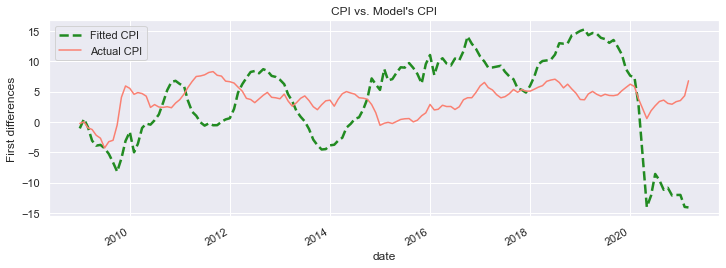

In [26]:
from sklearn import linear_model
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
X_train, y_train, X_test, y_test = timeseries_train_test_split(X=fred_features, y=cpi_target, testsize=0.25)

lasso = linear_model.LassoCV(cv=model_selection.TimeSeriesSplit(n_splits=5), 
                             alphas=None, tol = 10000) 

fred_lasso = lasso.fit(X_train, y_train)
optimal_alpha = fred_lasso.alpha_

lasso2 = linear_model.Lasso(alpha=optimal_alpha)
lasso2.fit(X_train, y_train)

train_test_plot(lasso2, X_train, X_test) 

In [27]:

metrics.mean_squared_error(y_test, lasso2.predict(X_test))

51.30684791771622

In [28]:
lasso_coefs = pd.DataFrame({"features":list(X_train), "coef": lasso2.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.coef != 0.0]
lasso_coefs.sort_values("coef", ascending=False)

,features,coef
188,BUSINVx_diff,9.558962e-06
60,AMDMUOx,2.815071e-06
61,BUSINVx,1.455776e-06
124,DTCTHFNM,9.883709e-07
157,CLAIMSx_diff,6.713037e-08
193,BOGMBASE_diff,-5.513408e-06
195,NONBORRES_diff,-6.811781e-06


In [29]:
old_names2 = ["CUSR0000SA0L5_diff", "CUSR0000SAS_diff", 
              "CUSR0000SAC_diff", "CPIULFSL_diff", "CUSR0000SA0L2_diff"]

new_names2 = ["cpi_lessmed", "cpi_serv", "cpi_comm", "cpi_lessfd", "cpi_lessshelt"]

for n,o in dict(zip(new_names2, old_names2)).items():
    fred = fred.rename(columns={o:n})

new_names2 = new_names2 + ["cpi_diff"]
mse2, df2 = var_create(columns=new_names2, data=fred)
print("The mean squared error between the forecasted and actual values is {mse2}")
mse2

The mean squared error between the forecasted and actual values is {mse2}


C:\Users\mcnel\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


9.639812011447763

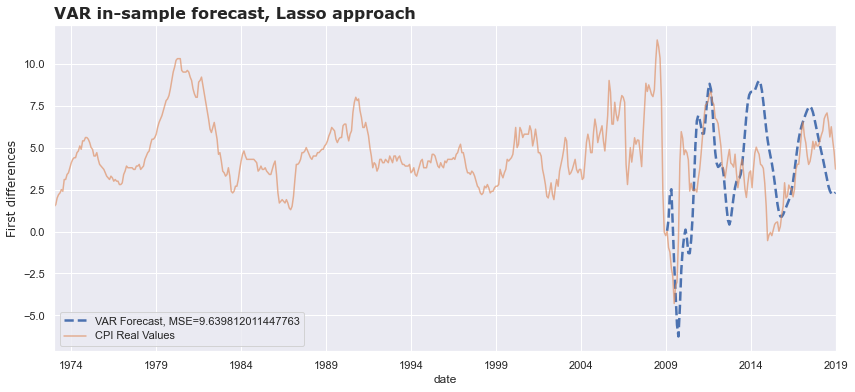

In [30]:
plot_cpi(final_data=df2, var_mse=mse2, approach="lasso")

In [31]:
who

Lasso	 LassoCV	 VAR	 X_test	 X_train	 c	 col	 cpi_target	 df1	 
df2	 dt	 dti	 end_date	 f	 fred	 fred_features	 fred_lasso	 lasso	 
lasso2	 lasso_coefs	 linear_model	 mean_squared_error	 metrics	 model_selection	 mse1	 mse2	 n	 
nd	 neural_network	 new_names	 new_names2	 new_names_diff	 np	 o	 od	 old_names	 
old_names2	 old_names_diff	 optimal_alpha	 pd	 pipeline	 plot_cpi	 plt	 preprocessing	 scatter_plot	 
scatter_subs	 sm	 sns	 start_date	 timeseries_train_test_split	 train_test_plot	 train_test_split	 var_create	 warnings	 
y_test	 y_train	 


In [32]:
VAR


statsmodels.tsa.vector_ar.var_model.VAR